In [ ]:
# for reading and dat manipulation
import pandas as pd
import numpy as np
# for data visuvalization
import matplotlib.pyplot as plt
import seaborn as sns
# for model creation and validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

## **Data Preprocessing**

In [ ]:
df=pd.read_csv("Singapore_flat_resale.csv")

<ipython-input-2-60a69f3417b4>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Singapore_flat_resale.csv")


In [ ]:
df.head()

,Unnamed: 0,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [ ]:
df.shape

(912252, 12)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,912252.0,137462.160118,99796.702929,0.0,47727.0,122256.0,214391.25,369650.0
floor_area_sqm,912252.0,95.698859,25.854862,28.0,73.0,93.0,113.00,307.0
lease_commence_date,912252.0,1988.113402,10.494467,1966.0,1981.0,1986.0,1996.00,2022.0
resale_price,912252.0,316333.486285,166649.650492,5000.0,191000.0,293000.0,410000.00,1500000.0


<pre> street_name column has no way can contribute to the prediction of resale_price:
 hence better to drop this column

In [ ]:
df.drop(columns=["street_name","Unnamed: 0"],axis=1,inplace=True)

# **Checking and handling missing values**

In [ ]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

<pre>I found remaining_lease column has 70% missing values.I strongly recommended to dropping this column

In [ ]:
df.drop("remaining_lease",axis=1,inplace=True)

In [ ]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

# **Data Type Correction**

In [ ]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
dtype: object

<pre>the data type of column month as "string" but it should "datetime"

In [ ]:
df['month']=pd.to_datetime(df['month']).dt.month

In [ ]:
df.head()

,month,town,flat_type,block,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1,ANG MO KIO,1 ROOM,309,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1,ANG MO KIO,1 ROOM,309,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1,ANG MO KIO,1 ROOM,309,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1,ANG MO KIO,1 ROOM,309,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1,ANG MO KIO,3 ROOM,216,04 TO 06,73.0,NEW GENERATION,1976,47200.0


<pre> the remaining column has the correct data type

In [ ]:
print(f'➤ Now the shape of the dataframe is {df.shape[0]} rows and {df.shape[1]} columns')

➤ Now the shape of the dataframe is 912252 rows and 9 columns


In [ ]:
integer_data_cols=[x for x in df.columns if df[x].dtypes=="int"]
integer_data_cols

['month', 'lease_commence_date']

In [ ]:
float_data_cols=[x for x in df.columns if df[x].dtypes=="float"]
float_data_cols

['floor_area_sqm', 'resale_price']

In [ ]:
object_data_cols=[x for x in df.columns if df[x].dtypes=="object"]
object_data_cols

['town', 'flat_type', 'block', 'storey_range', 'flat_model']

In [ ]:
for i in object_data_cols:
  print(f" Column '{i} is diveded into {len(df[i].value_counts())}' categories. ")

 Column 'town is diveded into 27' categories. 
 Column 'flat_type is diveded into 8' categories. 
 Column 'block is diveded into 2691' categories. 
 Column 'storey_range is diveded into 25' categories. 
 Column 'flat_model is diveded into 34' categories. 


In [ ]:
df['town'].value_counts()

TAMPINES           78936
YISHUN             69034
BEDOK              65924
JURONG WEST        65628
WOODLANDS          64449
ANG MO KIO         51505
HOUGANG            49854
BUKIT BATOK        43496
CHOA CHU KANG      37644
BUKIT MERAH        33790
PASIR RIS          32858
SENGKANG           31403
TOA PAYOH          31136
QUEENSTOWN         28416
GEYLANG            27866
CLEMENTI           27743
BUKIT PANJANG      27248
KALLANG/WHAMPOA    26740
JURONG EAST        24469
SERANGOON          22579
BISHAN             21068
PUNGGOL            19586
SEMBAWANG          13311
MARINE PARADE       7967
CENTRAL AREA        7052
BUKIT TIMAH         2486
LIM CHU KANG          64
Name: town, dtype: int64

In [ ]:
df['flat_type'].value_counts()

4 ROOM              345946
3 ROOM              292317
5 ROOM              192022
EXECUTIVE            68734
2 ROOM               11396
1 ROOM                1299
MULTI GENERATION       279
MULTI-GENERATION       259
Name: flat_type, dtype: int64

<pre> There are spelling mistakes in flat_type column

In [ ]:
df['flat_type']=df['flat_type'].replace({"MULTI GENERATION":"MULTI-GENERATION"})

In [ ]:
df['flat_type'].value_counts()

4 ROOM              345946
3 ROOM              292317
5 ROOM              192022
EXECUTIVE            68734
2 ROOM               11396
1 ROOM                1299
MULTI-GENERATION       538
Name: flat_type, dtype: int64

In [ ]:
df['block'].value_counts()

2       4552
1       3999
110     3379
101     3372
4       3314
        ... 
999B       2
996C       1
182B       1
226F       1
462B       1
Name: block, Length: 2691, dtype: int64

In [ ]:
df['storey_range'].value_counts()

04 TO 06    229149
07 TO 09    206993
01 TO 03    183778
10 TO 12    176144
13 TO 15     60586
16 TO 18     23529
19 TO 21     11119
22 TO 24      7249
25 TO 27      3327
01 TO 05      2700
06 TO 10      2474
28 TO 30      1563
11 TO 15      1259
31 TO 33       580
34 TO 36       544
37 TO 39       490
16 TO 20       265
40 TO 42       237
21 TO 25        92
43 TO 45        63
46 TO 48        46
26 TO 30        39
49 TO 51        17
36 TO 40         7
31 TO 35         2
Name: storey_range, dtype: int64

In [ ]:
df['flat_model'].value_counts()

Model A                   188793
Improved                  164731
New Generation            108321
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          45296
Simplified                 33772
Apartment                  25119
Standard                   24824
SIMPLIFIED                 23258
STANDARD                   17375
Maisonette                 17071
MAISONETTE                 12215
Model A2                    9968
APARTMENT                   9901
DBSS                        3152
Adjoined flat               1231
Model A-Maisonette          1071
MODEL A-MAISONETTE           982
Terrace                      441
Type S1                      427
MULTI GENERATION             279
Multi Generation             259
TERRACE                      247
Type S2                      210
Premium Apartment Loft       103
Premium Maisonette            86
Improved-Maisonette           81
2-room                        79
IMPROVED-M

In [ ]:
df['flat_model']=df['flat_model'].replace({"NEW GENERATION":"New Generation","MODEL A":"Model A","IMPROVED":"Improved",
                          "STANDARD":"Standard","SIMPLIFIED":"Simplified","MAISONETTE":"Maisonette",
                          "APARTMENT":"Apartment","MODEL A-MAISONETTE":"Model A-Maisonette","MULTI GENERATION":"Multi Generation",
                          "IMPROVED-MAISONETTE":"Improved-Maisonette","PREMIUM APARTMENT":"Premium Apartment","TERRACE":"Terrace","2-ROOM":"2-room"})

In [ ]:
df['flat_model'].value_counts()

Model A                   259174
Improved                  238320
New Generation            187219
Simplified                 57030
Premium Apartment          45302
Standard                   42199
Apartment                  35020
Maisonette                 29286
Model A2                    9968
DBSS                        3152
Model A-Maisonette          2053
Adjoined flat               1231
Terrace                      688
Multi Generation             538
Type S1                      427
Type S2                      210
Improved-Maisonette          125
Premium Apartment Loft       103
2-room                       100
Premium Maisonette            86
3Gen                          21
Name: flat_model, dtype: int64

Text(0.5, 1.0, 'flat price according to Flat Type')

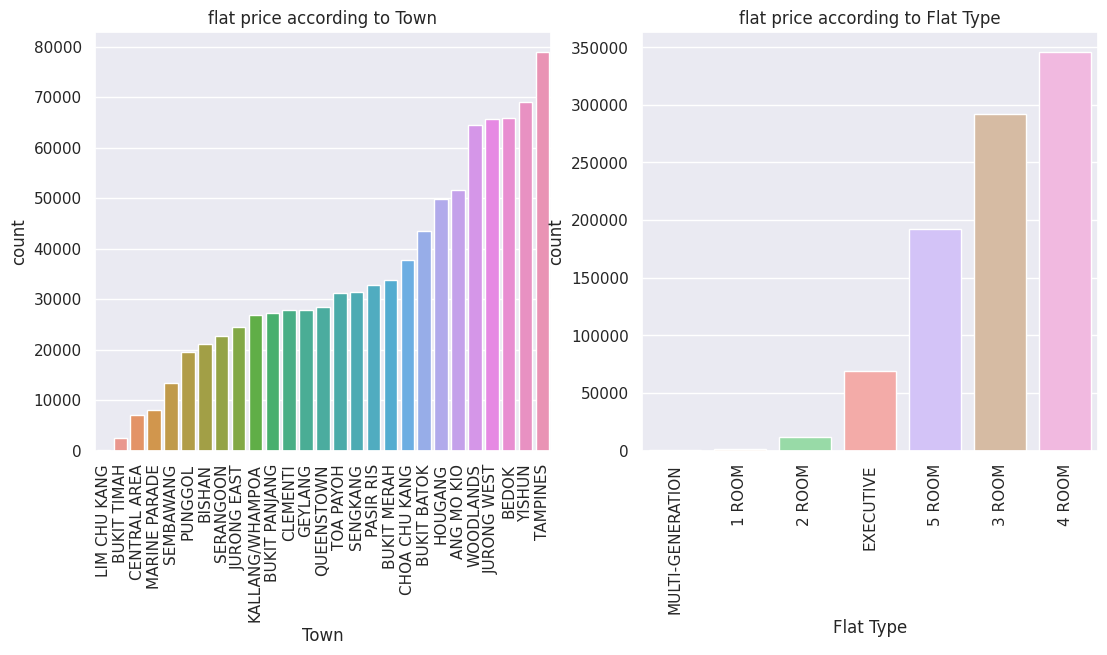

In [ ]:
plt.figure(figsize=(20,25))
sns.set_theme(style="darkgrid",palette="pastel")

plt.subplot(431)
sns.countplot(x=df['town'],order=df['town'].value_counts().index[::-1])
plt.xticks(rotation=90)
plt.xlabel("Town")
plt.title("flat price according to Town")


plt.subplot(432)
sns.countplot(x=df['flat_type'],order=df['flat_type'].value_counts().index[::-1])
plt.xticks(rotation=90)
plt.xlabel("Flat Type")
plt.title("flat price according to Flat Type")


Text(0.5, 1.0, 'flat price according to storey_range')

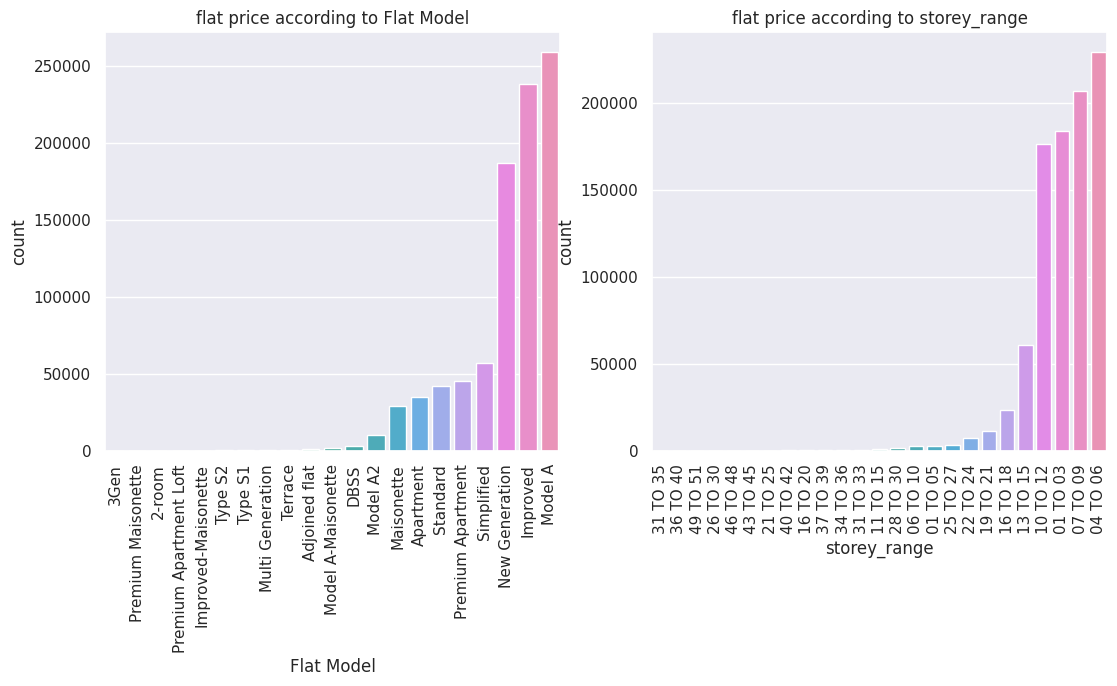

In [ ]:
plt.figure(figsize=(20,25))
sns.set_theme(style="darkgrid",palette="pastel")

plt.subplot(431)
sns.countplot(x=df['flat_model'],order=df['flat_model'].value_counts().index[::-1])
plt.xticks(rotation=90)
plt.xlabel("Flat Model")
plt.title("flat price according to Flat Model")

plt.subplot(432)
sns.countplot(x=df['storey_range'],order=df['storey_range'].value_counts().index[::-1])
plt.xticks(rotation=90)
plt.xlabel("storey_range")
plt.title("flat price according to storey_range")

<ipython-input-29-633bf5f8fbe2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['floor_area_sqm'])
<ipython-input-29-633bf5f8fbe2>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['lease_commence_date'])
<ipython-input-29-633bf5f8fbe2>:15: UserWarning: 

`distplot` is a deprecated fu

Text(0.5, 1.0, 'flat price according to resale price')

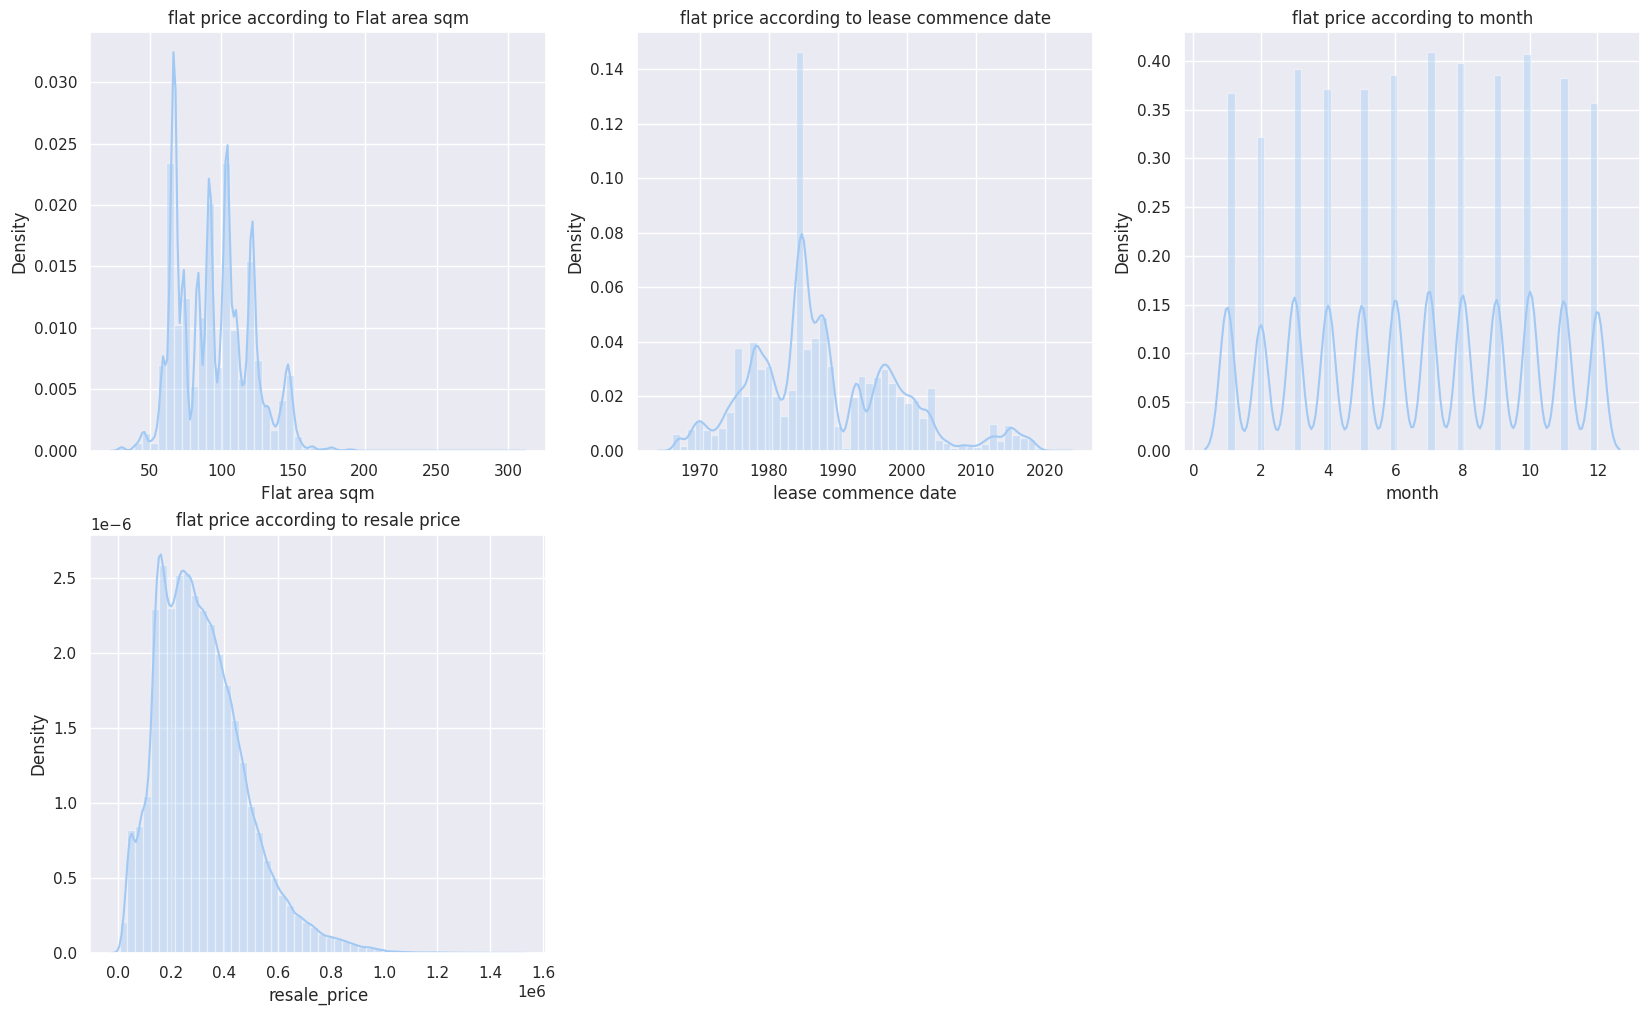

In [ ]:
plt.figure(figsize=(20,25))
sns.set_theme(style="darkgrid",palette="pastel")

plt.subplot(431)
sns.distplot(x=df['floor_area_sqm'])
plt.xlabel("Flat area sqm")
plt.title("flat price according to Flat area sqm")

plt.subplot(432)
sns.distplot(x=df['lease_commence_date'])
plt.xlabel("lease commence date")
plt.title("flat price according to lease commence date")

plt.subplot(433)
sns.distplot(x=df["month"])
plt.xlabel("month")
plt.title("flat price according to month")

plt.subplot(434)
sns.distplot(x=df['resale_price'])
plt.xlabel("resale_price")
plt.title("flat price according to resale price")

Text(0.5, 1.0, 'flat price vs storey_range')

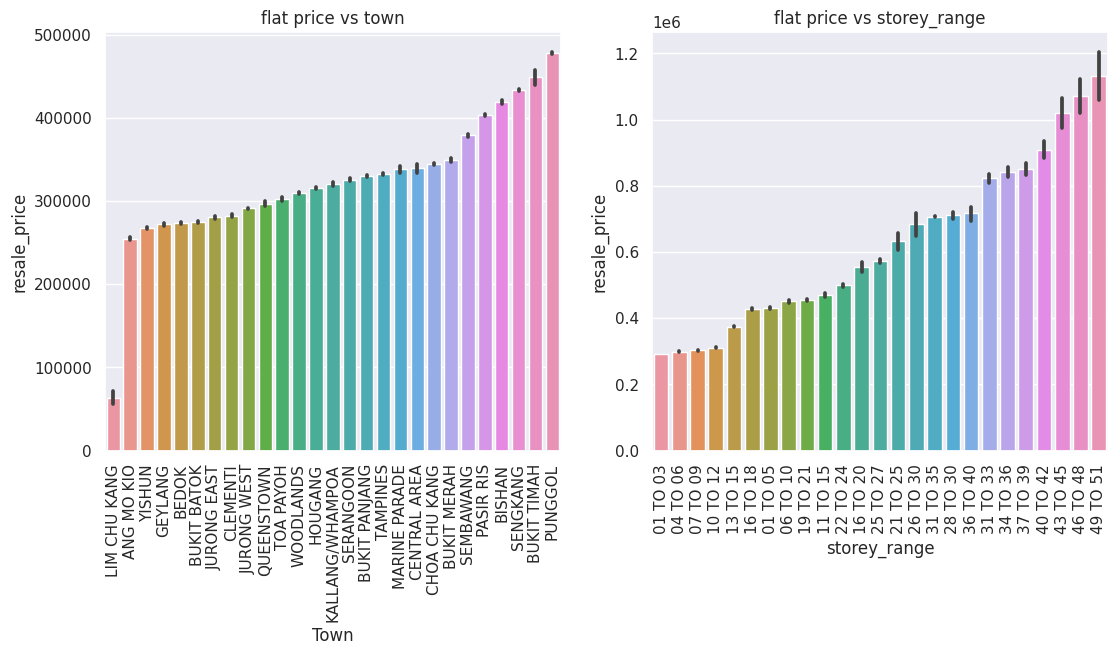

In [ ]:
plt.figure(figsize=(20,25))
sns.set_theme(style="darkgrid",palette="pastel")

plt.subplot(431)
sns.barplot(x=df['town'],y=df['resale_price'],order=df.groupby("town")["resale_price"].mean().reset_index().sort_values("resale_price")["town"])
plt.xticks(rotation=90)
plt.xlabel("Town")
plt.title("flat price vs town")

plt.subplot(432)
sns.barplot(x=df['storey_range'],y=df['resale_price'],order=df.groupby("storey_range")["resale_price"].mean().reset_index().sort_values("resale_price")["storey_range"])
plt.xticks(rotation=90)
plt.xlabel("storey_range")
plt.title("flat price vs storey_range")


Text(0.5, 1.0, 'flat price vs flat_model')

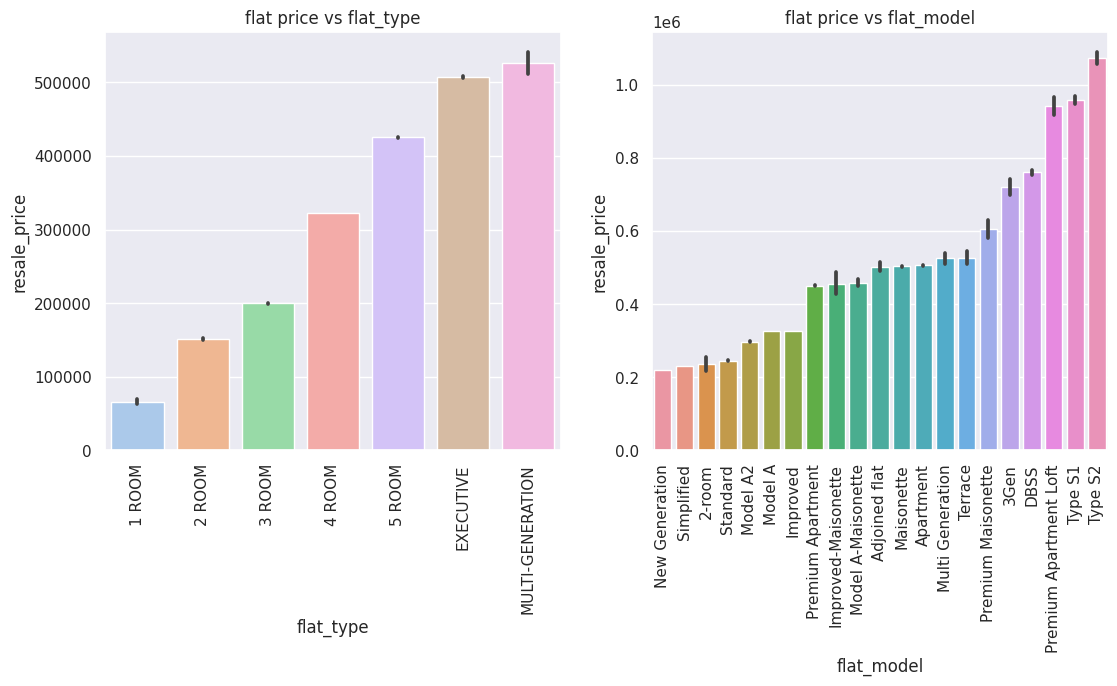

In [ ]:
plt.figure(figsize=(20,25))
sns.set_theme(style="darkgrid",palette="pastel")

plt.subplot(431)
sns.barplot(x=df['flat_type'],y=df['resale_price'],order=df.groupby("flat_type")["resale_price"].mean().reset_index().sort_values("resale_price")["flat_type"])
plt.xticks(rotation=90)
plt.xlabel("flat_type")
plt.title("flat price vs flat_type")

plt.subplot(432)
sns.barplot(x=df['flat_model'],y=df['resale_price'],order=df.groupby("flat_model")["resale_price"].mean().reset_index().sort_values("resale_price")["flat_model"])
plt.xticks(rotation=90)
plt.xlabel("flat_model")
plt.title("flat price vs flat_model")

Text(0.5, 1.0, 'lease_commence_date vs flat price')

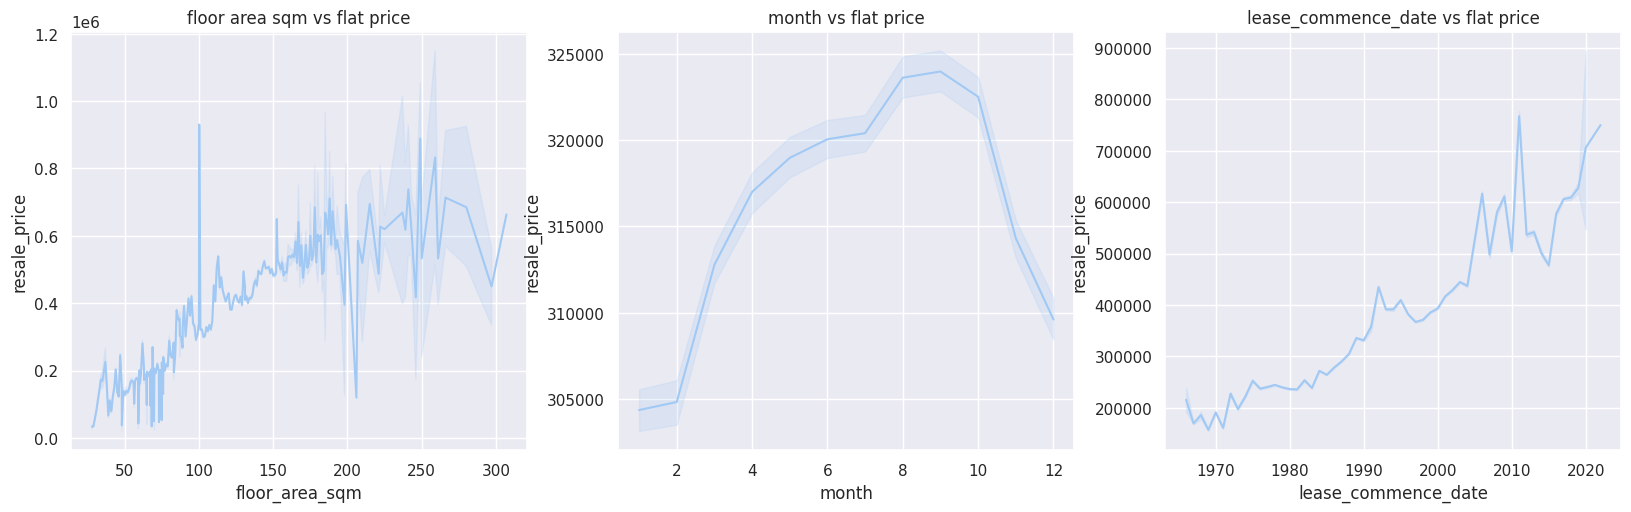

In [ ]:
plt.figure(figsize=(20,25))
sns.set_theme(style="darkgrid",palette="pastel")

plt.subplot(431)
sns.lineplot(x=df['floor_area_sqm'],y=df['resale_price'])
plt.title("floor area sqm vs flat price")

plt.subplot(432)
sns.lineplot(x=df['month'],y=df['resale_price'])
plt.title("month vs flat price")

plt.subplot(433)
sns.lineplot(x=df['lease_commence_date'],y=df['resale_price'])
plt.title("lease_commence_date vs flat price")

<ipython-input-33-c12388e2da2b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method="pearson"),annot=True)


<Axes: >

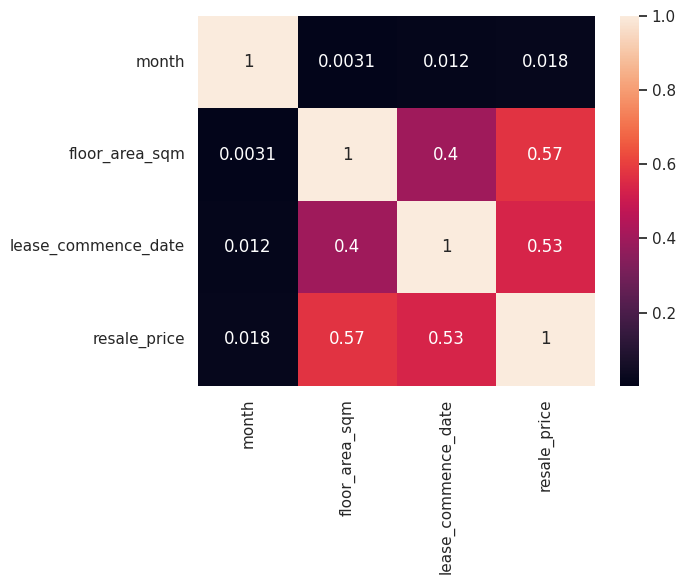

In [ ]:
sns.heatmap(df.corr(method="pearson"),annot=True)

In [ ]:
del df['month']
del df['block']


In [ ]:
df.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2.0,1 ROOM,10 TO 12,31.0,Improved,1977,9000.0
1,2.0,1 ROOM,04 TO 06,31.0,Improved,1977,6000.0
2,2.0,1 ROOM,10 TO 12,31.0,Improved,1977,8000.0
3,2.0,1 ROOM,07 TO 09,31.0,Improved,1977,6000.0
4,2.0,3 ROOM,04 TO 06,73.0,New Generation,1976,47200.0


In [ ]:
df.groupby("town")["resale_price"].mean().reset_index().sort_values("resale_price")["town"]

15       LIM CHU KANG
0          ANG MO KIO
26             YISHUN
10            GEYLANG
1               BEDOK
3         BUKIT BATOK
12        JURONG EAST
9            CLEMENTI
13        JURONG WEST
19         QUEENSTOWN
24          TOA PAYOH
25          WOODLANDS
11            HOUGANG
14    KALLANG/WHAMPOA
22          SERANGOON
5       BUKIT PANJANG
23           TAMPINES
16      MARINE PARADE
7        CENTRAL AREA
8       CHOA CHU KANG
4         BUKIT MERAH
20          SEMBAWANG
17          PASIR RIS
2              BISHAN
21           SENGKANG
6         BUKIT TIMAH
18            PUNGGOL
Name: town, dtype: object

In [ ]:
df['town']=df['town'].map({"LIM CHU KANG":0,"ANG MO KIO":2,"GEYLANG":3,"BEDOK":4,"BUKIT BATOK":5,"JURONG EAST":6,"CLEMENTI":7,"JURONG WEST":8,"QUEENSTOWN":9,
                           "TOA PAYOH":10,"WOODLANDS":11,"HOUGANG":12,"KALLANG/WHAMPOA":13,"SERANGOON":14,"BUKIT PANJANG":15,"TAMPINES":16,"MARINE PARADE":17,
                           "CENTRAL AREA":18,"CHOA CHU KANG":19,"BUKIT MERAH":20,"SEMBAWANG":21,"PASIR RIS":22,"BISHAN":23,"SENGKANG":24,"BUKIT TIMAH":25,"PUNGGOL":26})

In [ ]:
df['town'].value_counts()

16.0    78936
4.0     65924
8.0     65628
11.0    64449
2.0     51505
12.0    49854
5.0     43496
19.0    37644
20.0    33790
22.0    32858
24.0    31403
10.0    31136
9.0     28416
3.0     27866
7.0     27743
15.0    27248
13.0    26740
6.0     24469
14.0    22579
23.0    21068
26.0    19586
21.0    13311
17.0     7967
18.0     7052
25.0     2486
0.0        64
Name: town, dtype: int64

In [ ]:
df['town'].isnull().sum()

69034